In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [2]:
class Demo_model:
    def __init__(self, w, mu, sig):
        self._x = np.expand_dims(np.arange(-10,10), axis=1)
        self._poly = np.poly1d(w)
        self._y = self.generate_data_1d(self._x, mu,sig)
        self._polywf = None
        self._ploywr2 = None
        self._ploywr2_value = None
    
    def plot(self):
        plt.plot(self._x, self._poly(self._x),'g')
        plt.plot(self._x, self._polywf(self._x),'b')
        plt.plot(self._x, self._ploywr2_value,'r')
        plt.show()
            
    def generate_data_1d(self, x, mu, sig):
        num_samples = x.shape[0]
        # Generate noise
        noise = np.random.normal(loc=mu, scale=sig, size=x.shape)
        # Compute outputs y, equal to x^T w plus the noise
        y = self._poly(self._x) + noise
        return y
    
    def train(self, poly, r2):
        #Fit without regulizer
        self._polywf = np.poly1d(np.polyfit(self._x.T[0], self._y.T[0], poly))
        
        #Fit with l2 regulizer with lamda
        po = PolynomialFeatures(poly, include_bias=True)
        x = po.fit_transform(self._x.reshape(1, -1).T)
        rg = Ridge(alpha = r2)
        self._ploywr2 = rg.fit(x,self._y)
        self._ploywr2_value = self._ploywr2.predict(x)

In [17]:
w = np.array([0.1,0.2,0.1,4])
model = Demo_model(w,0,50)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


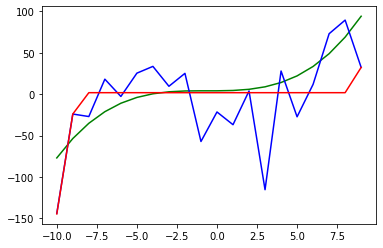

In [23]:
model.train(100,1)
model.plot()